In [1]:
# Import
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
import concurrent.futures
import pandas as pd

In [2]:
# Load local libraries
# ROOT contais the project directory 
os.chdir(os.path.dirname(os.getcwd()))
print(os.getcwd())

/home/ubuntu/master_thesis


In [3]:
# Local imports
from src.Fundus import Fundus

In [4]:
%%time
datadir = "/mnt/ukbb/raw/"

def pal4im(image):
    a = Fundus(os.path.join("/mnt/ukbb/raw/", image))
    return a.get_radius()

with concurrent.futures.ProcessPoolExecutor() as executor:
    results = executor.map(pal4im, os.listdir(datadir))

results = [r for r in results]

CPU times: user 1min 27s, sys: 11.6 s, total: 1min 39s
Wall time: 23min 2s


<AxesSubplot:ylabel='Density'>

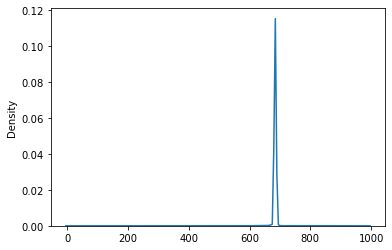

In [5]:
sns.kdeplot(results)

In [51]:
res_df = pd.DataFrame(results).sort_values(by=0)

<AxesSubplot:ylabel='Density'>

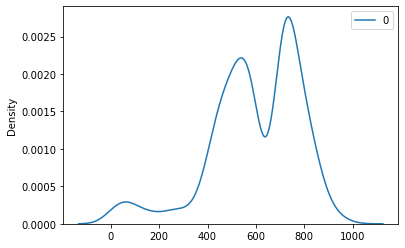

In [96]:
sns.kdeplot(data=res_df[(res_df[0] <= 600) | (res_df[0] > 700)])


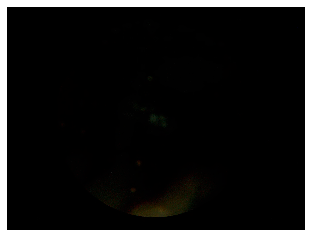

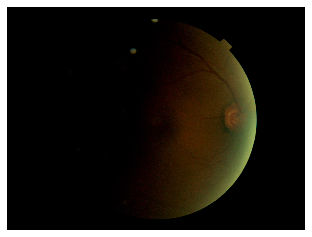

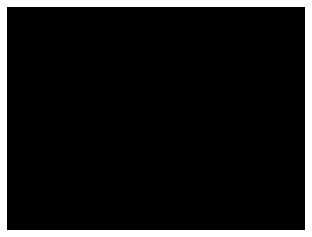

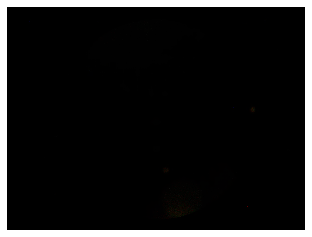

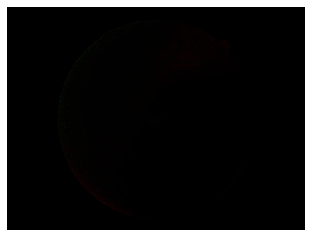

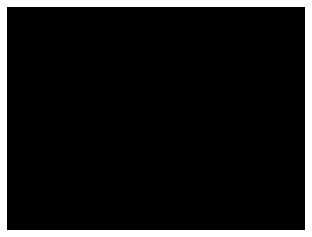

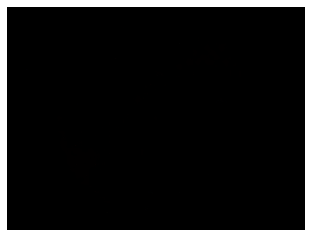

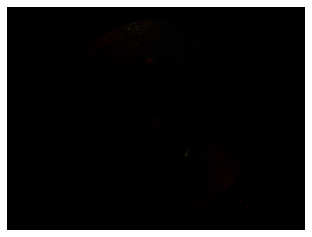

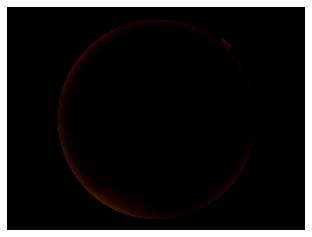

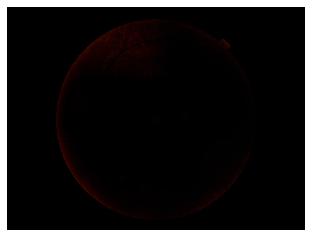

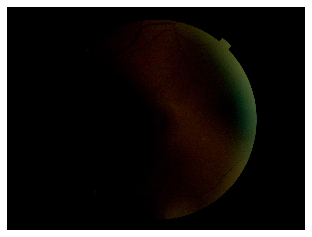

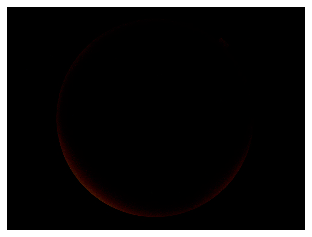

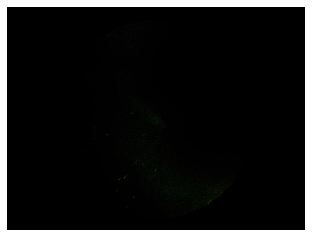

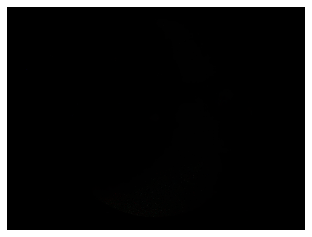

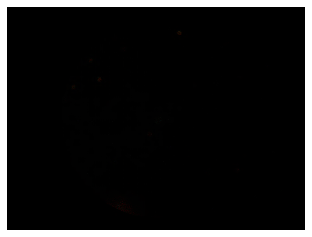

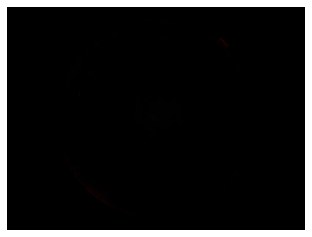

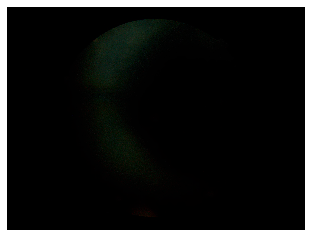

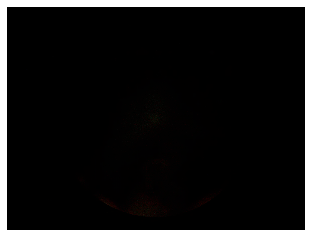

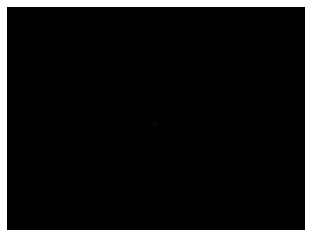

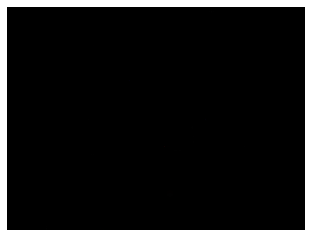

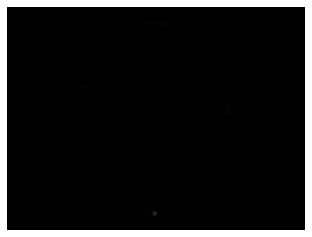

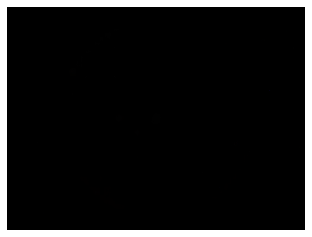

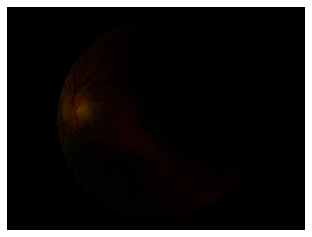

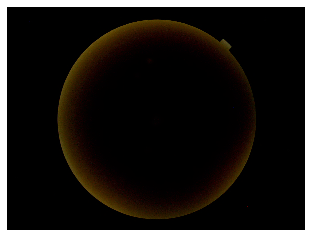

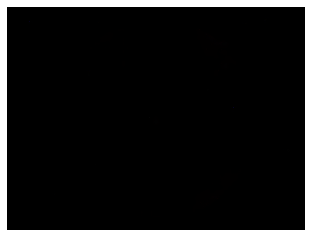

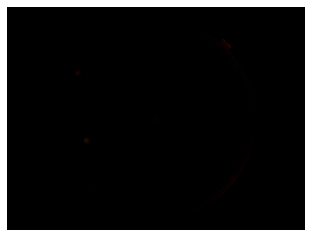

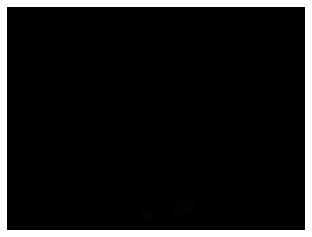

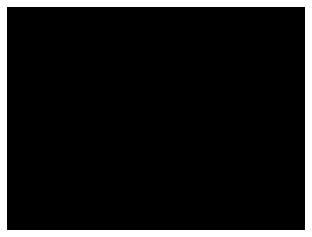

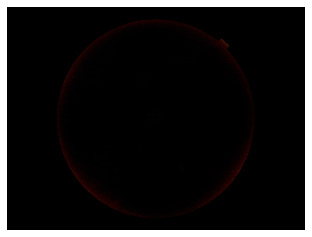

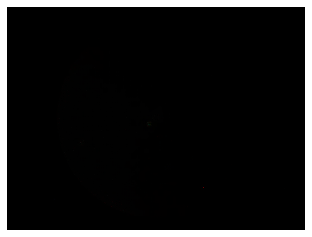

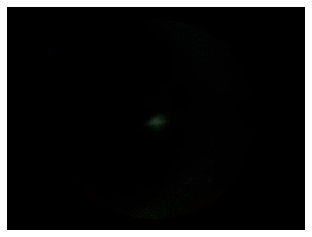

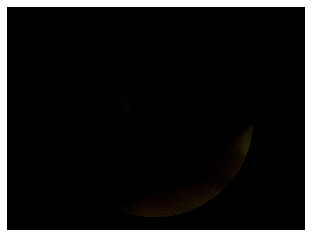

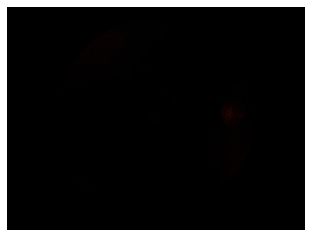

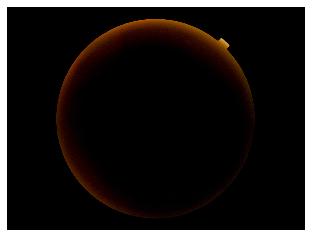

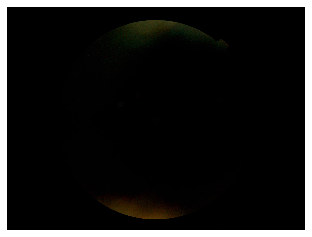

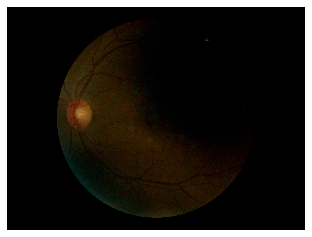

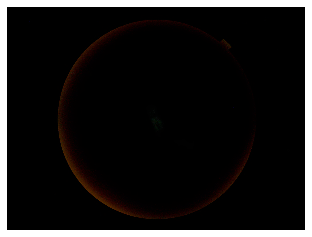

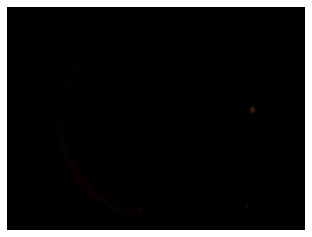

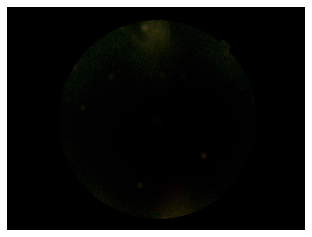

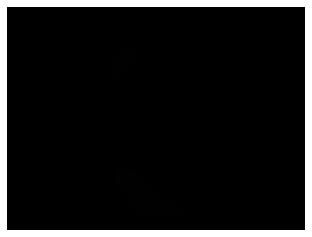

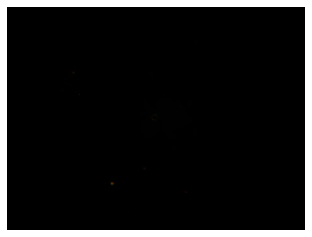

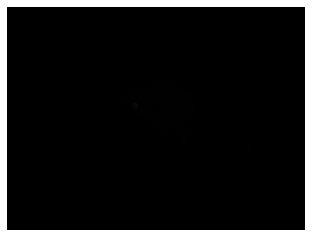

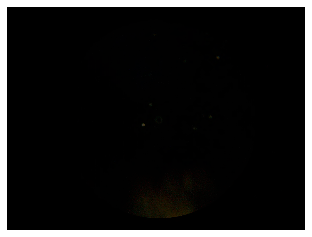

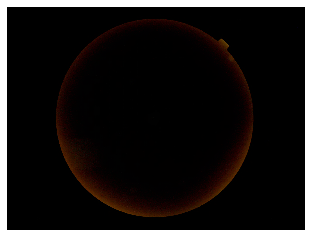

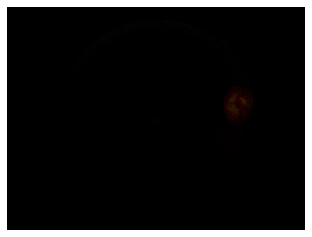

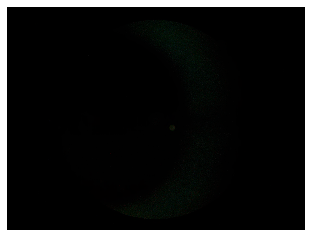

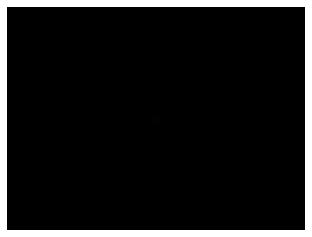

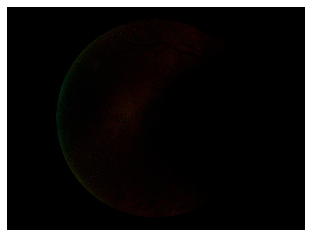

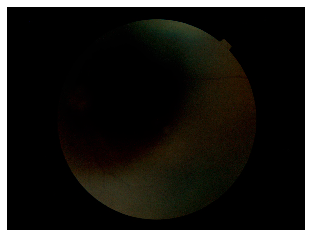

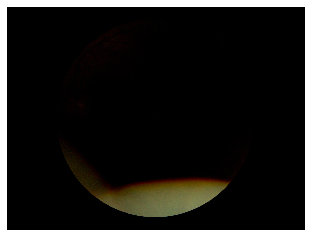

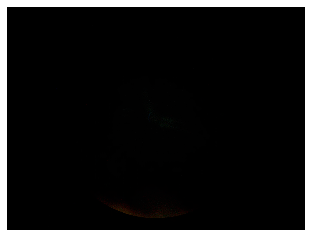

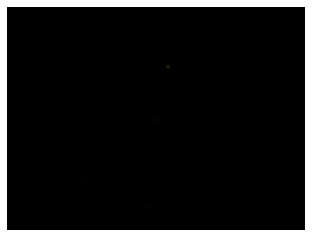

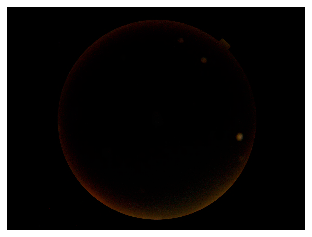

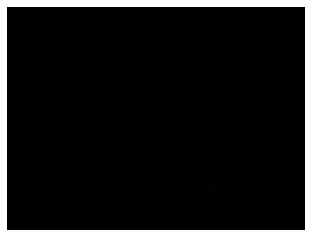

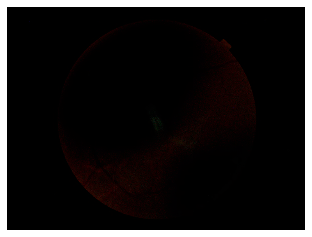

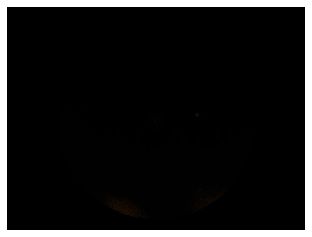

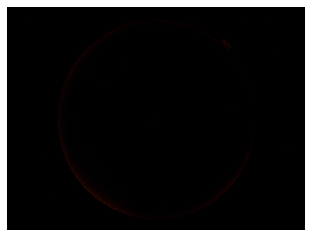

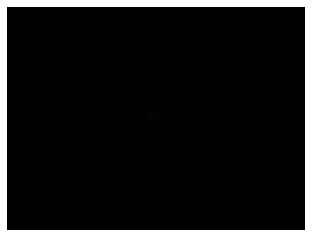

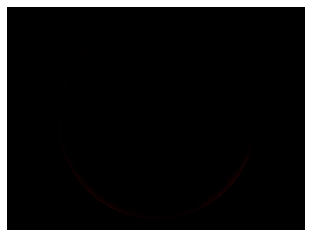

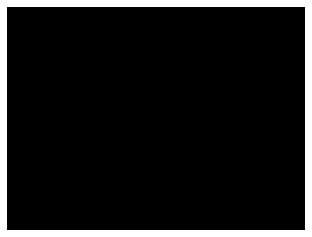

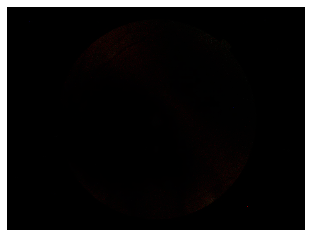

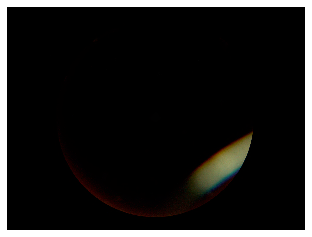

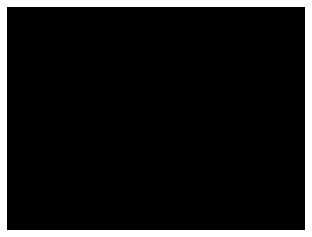

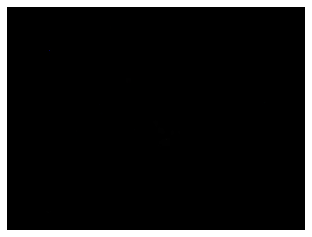

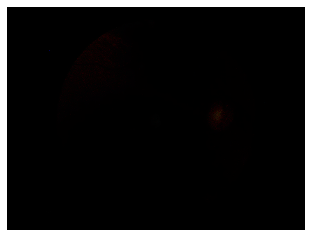

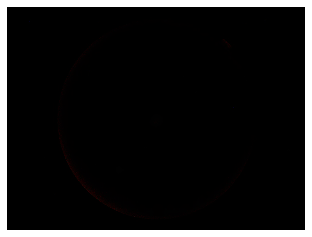

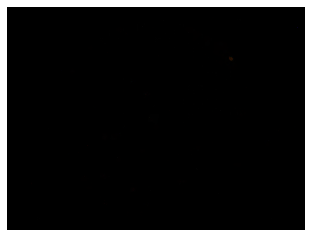

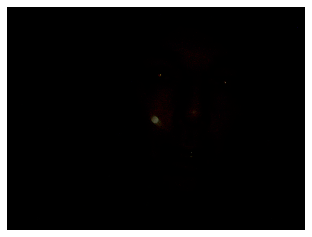

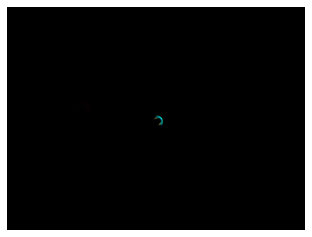

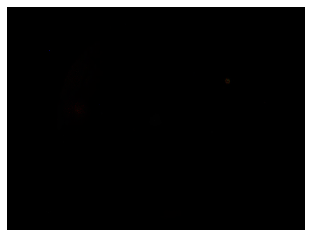

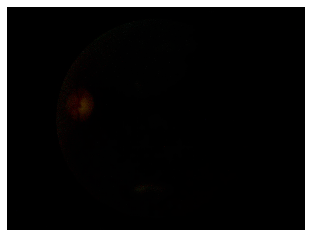

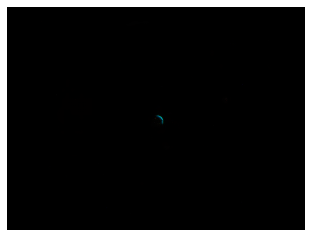

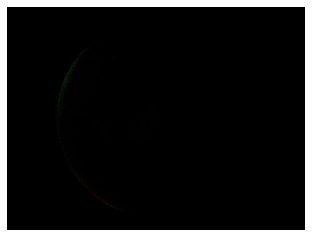

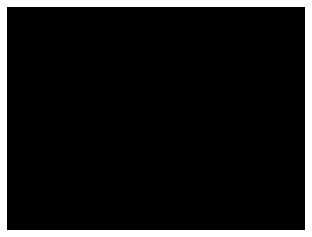

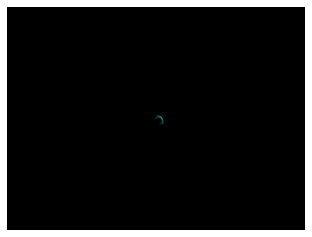

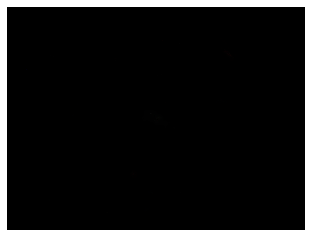

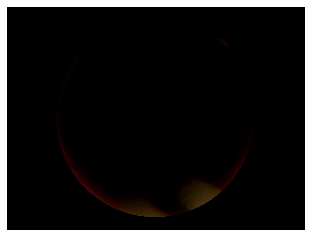

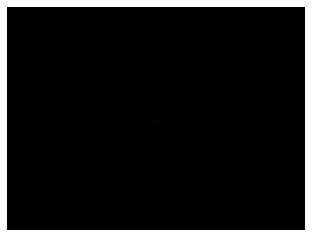

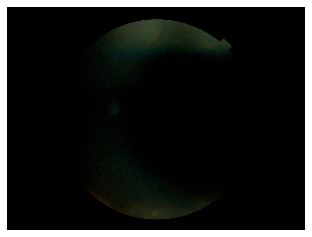

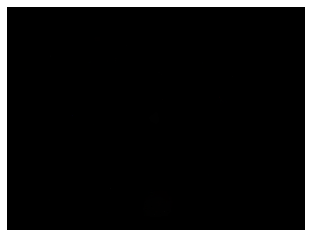

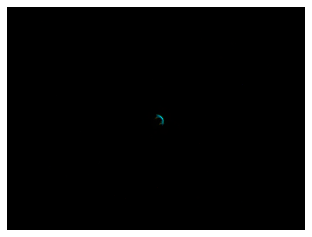

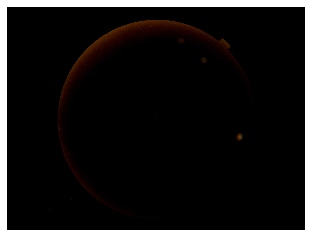

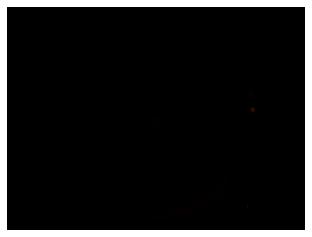

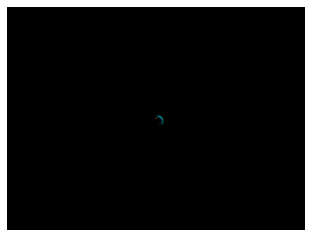

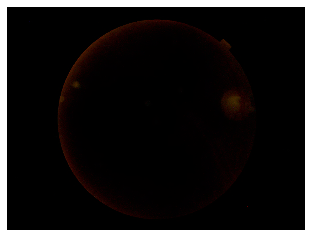

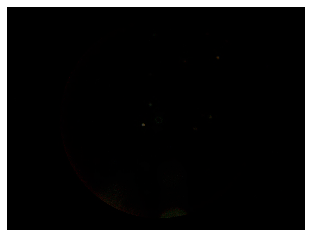

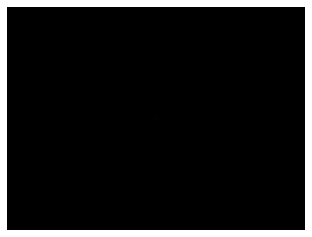

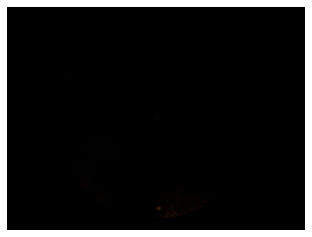

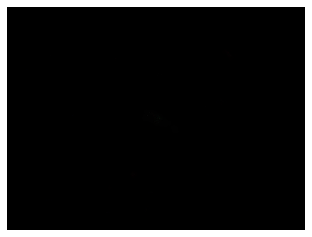

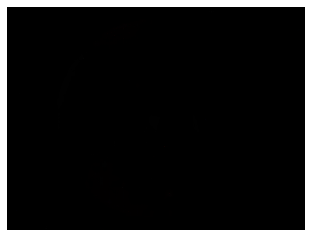

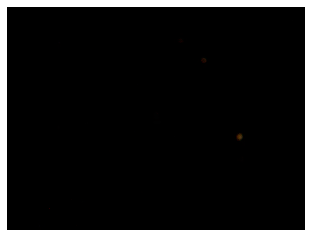

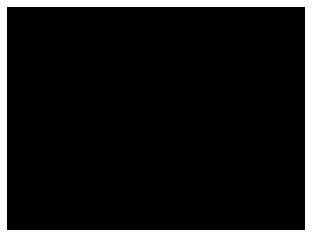

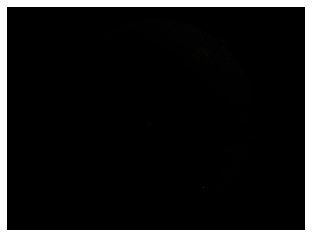

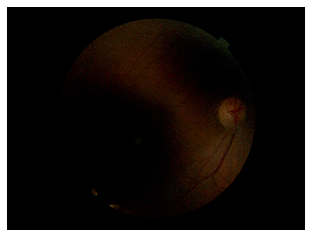

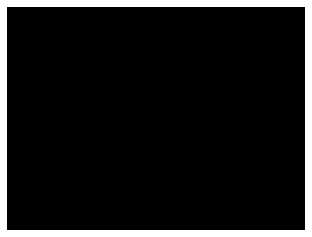

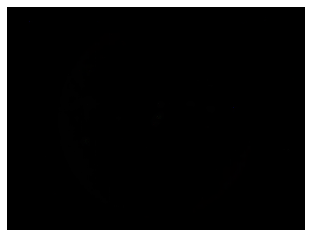

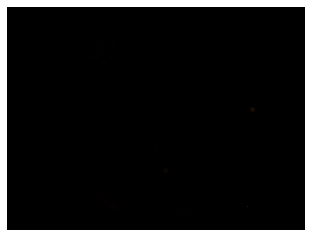

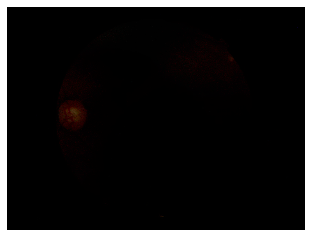

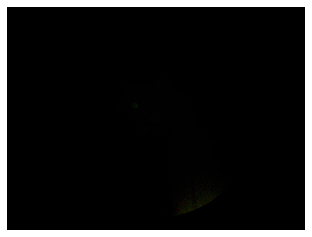

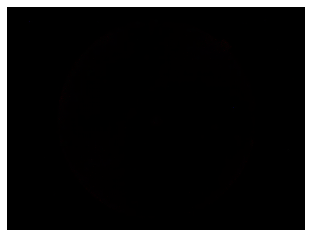

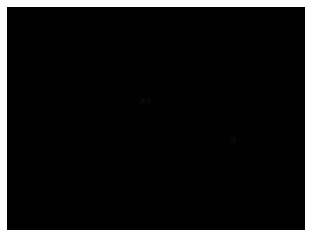

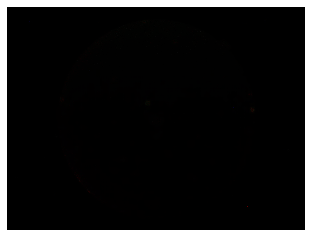

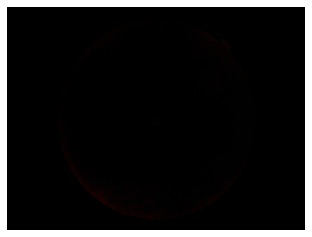

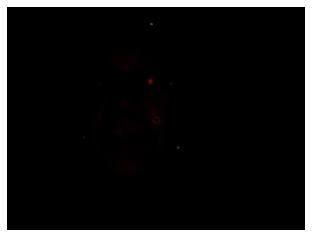

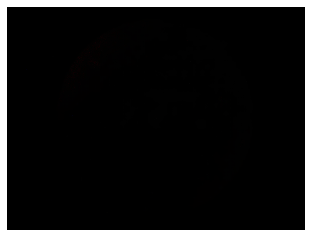

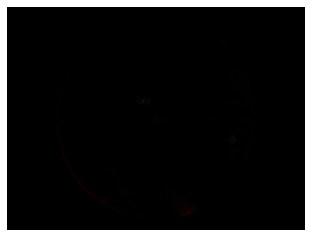

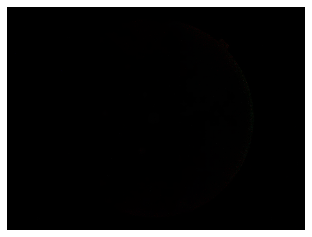

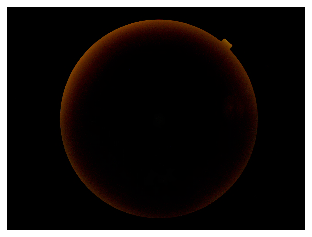

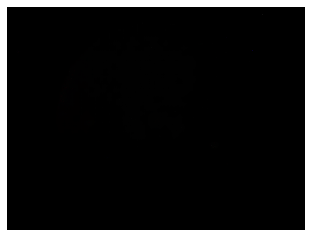

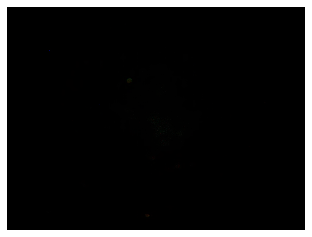

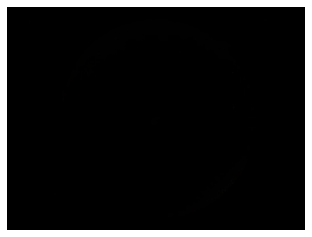

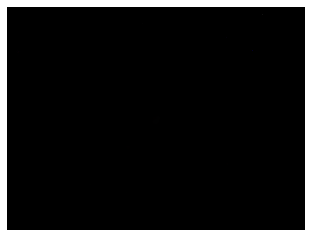

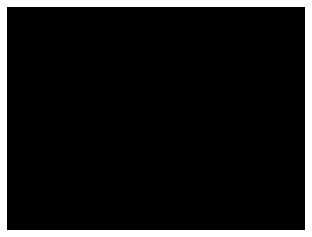

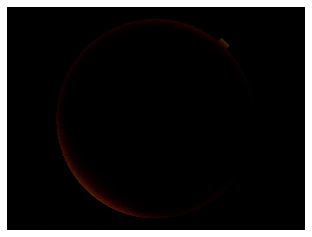

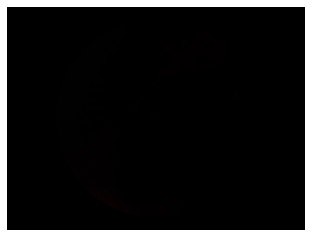

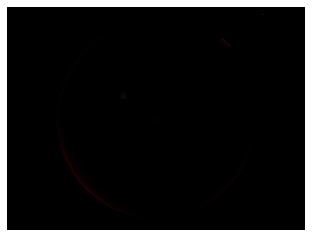

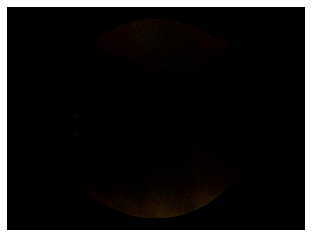

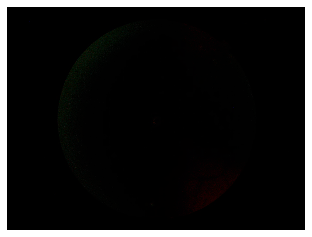

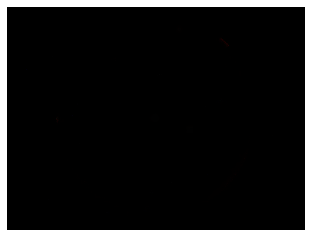

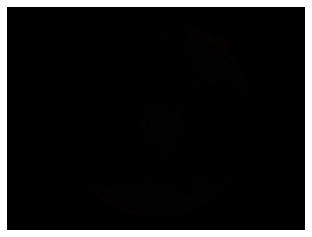

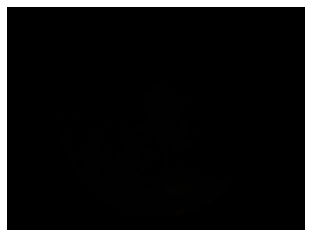

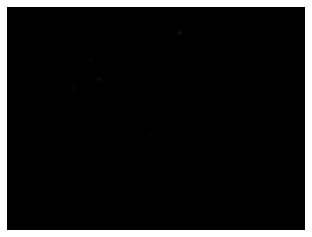

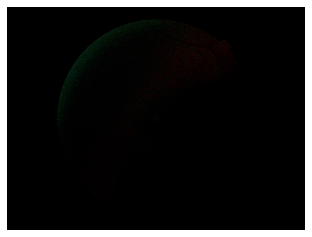

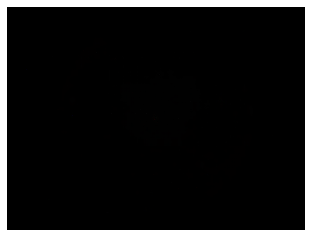

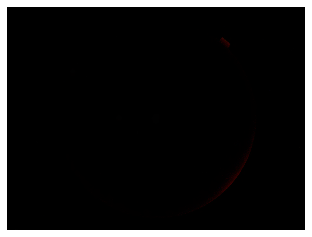

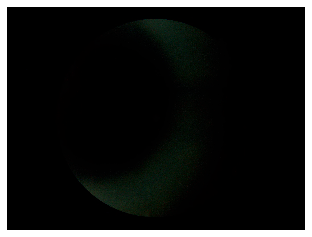

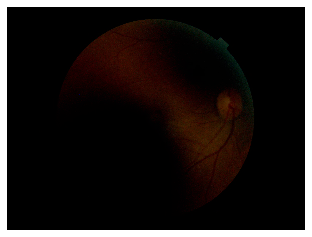

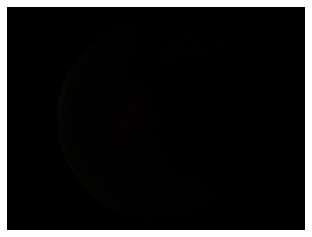

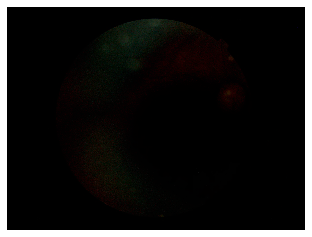

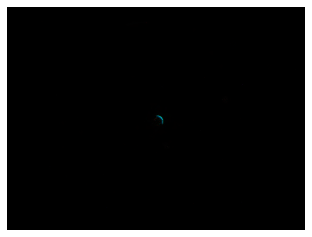

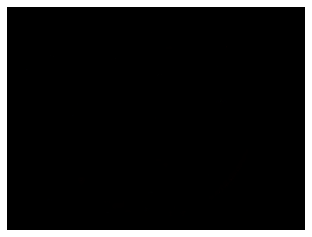

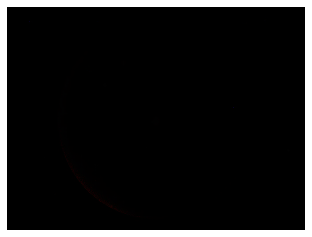

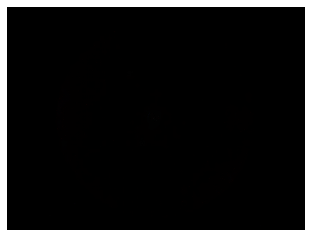

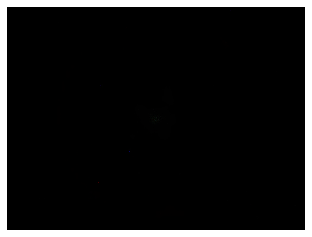

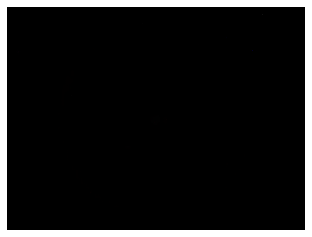

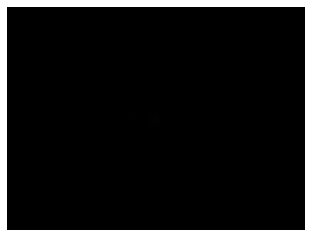

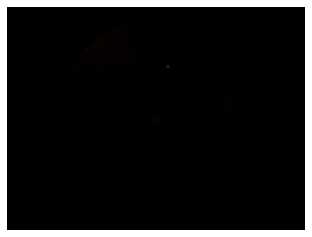

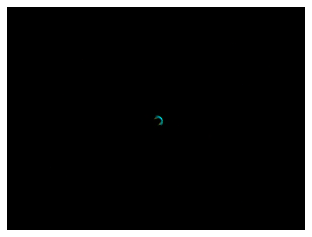

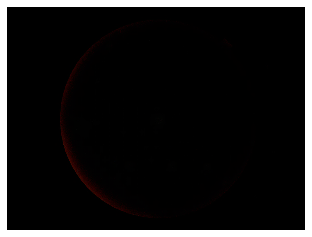

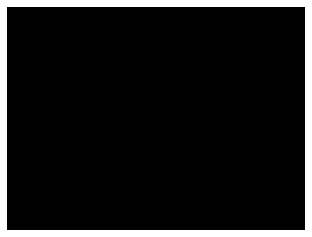

In [50]:
for i,j in zip(os.listdir(datadir), results):
    #if j > 705 and j < 710:
    if j < 400:
        #print (i, j)
        Fundus(f"/mnt/ukbb/raw/{i}").show()
        #Fundus(f"data/normalized/test/male/{i}").show()

In [23]:
pd.DataFrame(results)[0].value_counts()

681.5    591
682.5    488
685.5    483
686.0    414
682.0    406
        ... 
661.5      1
722.0      1
59.5       1
562.0      1
819.0      1
Name: 0, Length: 113, dtype: int64